In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import  cross_val_score, cross_validate
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier




In [2]:
data=pd.read_csv("cleaned")

In [3]:
data

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim
0,2012,1.0,1,0.0,1.0,1.0,0.0,1240.0,3.0,0,75117,0
1,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,0,62916,0
2,2013,1.0,1,1.0,0.0,0.0,1.0,4984.0,1.0,4,31149,1
3,2016,0.5,0,0.0,1.0,1.0,0.0,600.0,3.0,0,6012,1
4,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,0,57631,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2013,1.0,0,0.0,1.0,1.0,0.0,550.0,2.0,0,33063,1
4966,2012,0.5,0,1.0,0.0,0.0,1.0,1000.0,0.0,4,13004,0
4967,2015,1.0,1,1.0,0.0,0.0,1.0,480.0,2.0,3,94059,0
4968,2012,0.5,0,1.0,0.0,0.0,1.0,536.0,0.0,4,74243,0


In [4]:
le = LabelEncoder()
# Appliquer l'encodage
data['Geo_Code'] = le.fit_transform(data['Geo_Code'])


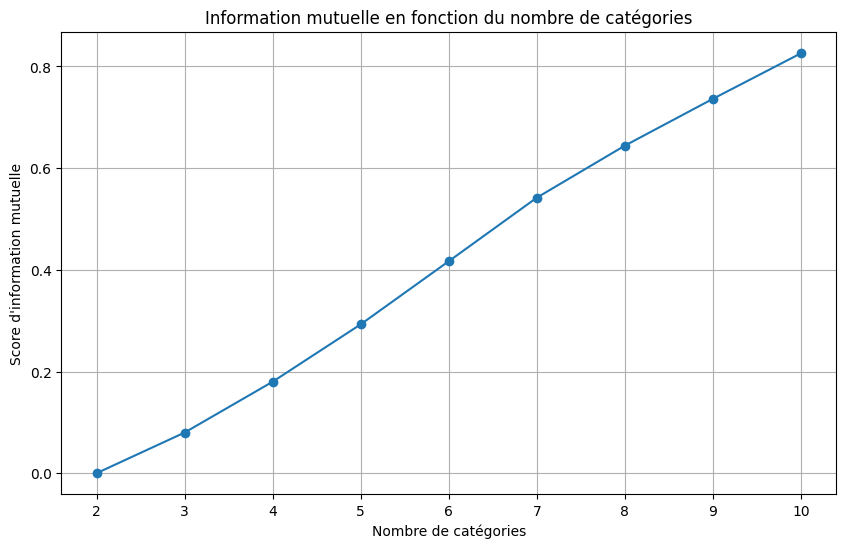

In [5]:
# Étape 1 : Fonction pour catégoriser une colonne
def categorize_column(df, column, bins):
    labels = [f"Cat-{i}" for i in range(1, len(bins))]
    df[f"{column}_category"] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)
    return df

# Étape 2 : Fonction pour calculer le meilleur nombre de catégories
def optimal_bins(df, column, max_bins=10):
    scores = []
    for num_bins in range(2, max_bins + 1):
        bins = np.linspace(df[column].min(), df[column].max(), num_bins)
        categories = pd.cut(df[column], bins=bins, labels=False, include_lowest=True)
        score = mutual_info_score(categories, categories)  # Information mutuelle
        scores.append(score)
    return scores

# Étape 3 : Calcul des scores pour différents nombres de bins
max_bins = 10
scores = optimal_bins(data, 'Building_Dimension', max_bins)

# Étape 4 : Visualisation des scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_bins + 1), scores, marker='o')
plt.title("Information mutuelle en fonction du nombre de catégories")
plt.xlabel("Nombre de catégories")
plt.ylabel("Score d'information mutuelle")
plt.grid()
plt.show()

In [6]:
data

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim
0,2012,1.0,1,0.0,1.0,1.0,0.0,1240.0,3.0,0,795,0
1,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,0,563,0
2,2013,1.0,1,1.0,0.0,0.0,1.0,4984.0,1.0,4,203,1
3,2016,0.5,0,0.0,1.0,1.0,0.0,600.0,3.0,0,495,1
4,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,0,464,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2013,1.0,0,0.0,1.0,1.0,0.0,550.0,2.0,0,222,1
4966,2012,0.5,0,1.0,0.0,0.0,1.0,1000.0,0.0,4,27,0
4967,2015,1.0,1,1.0,0.0,0.0,1.0,480.0,2.0,3,1077,0
4968,2012,0.5,0,1.0,0.0,0.0,1.0,536.0,0.0,4,765,0


In [7]:
if isinstance(data, pd.DataFrame):
    print("data est un DataFrame")
elif isinstance(data, pd.Series):
    print("data est une Series")
else:
    print("data n'est ni un DataFrame ni une Series")

data est un DataFrame


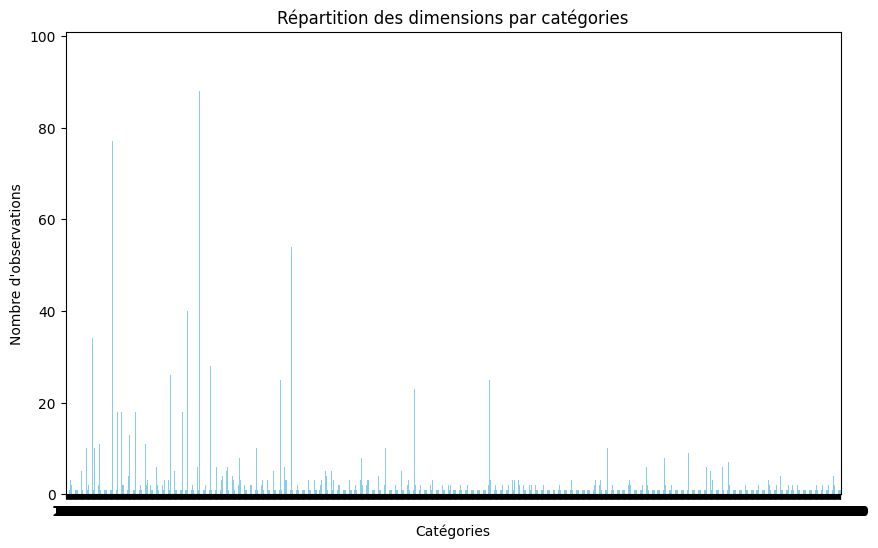

In [8]:
# Étape 5 : Visualiser les catégories
plt.figure(figsize=(10, 6))
data[f'Building_Dimension'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Répartition des dimensions par catégories")
plt.xlabel("Catégories")
plt.ylabel("Nombre d'observations")
plt.xticks(rotation=0)
plt.show()

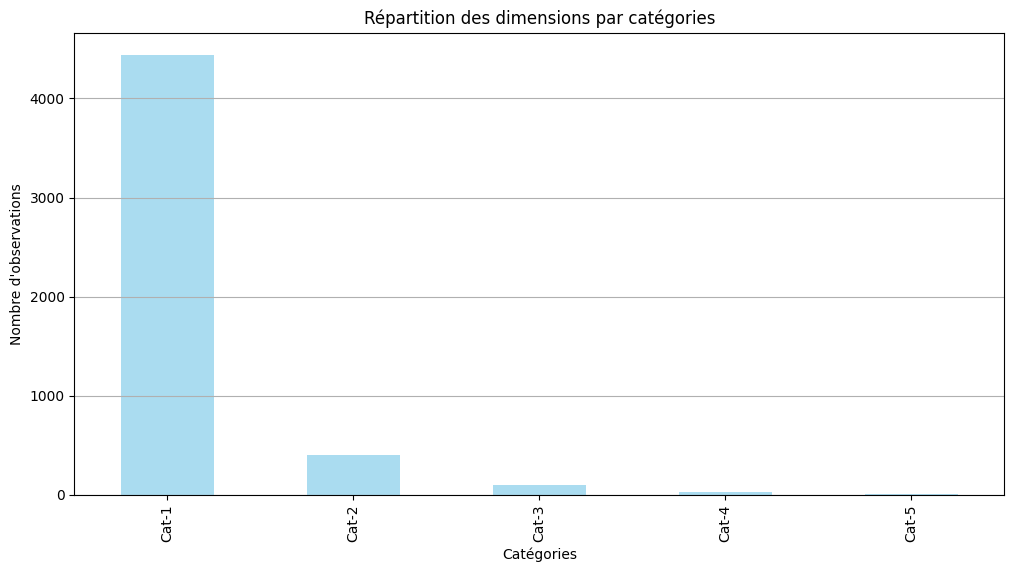

In [9]:
# Étape 5 : Catégoriser la colonne avec le nombre optimal de catégories (exemple : 5 catégories)
optimal_num_bins = 5  # Vous pouvez choisir en fonction de la courbe ci-dessus
bins = np.linspace(data['Building_Dimension'].min(), data['Building_Dimension'].max(), optimal_num_bins + 1)
df = categorize_column(data, 'Building_Dimension', bins)


encoder = LabelEncoder()
df['Building_Dimension_category_encoded'] = encoder.fit_transform(df['Building_Dimension_category'])

# Étape 6 : Visualiser la répartition des observations par catégorie
plt.figure(figsize=(12, 6))
data['Building_Dimension_category'].value_counts(sort=False).plot(kind='bar', color='skyblue', alpha=0.7)
plt.title("Répartition des dimensions par catégories")
plt.xlabel("Catégories")
plt.ylabel("Nombre d'observations")
plt.grid(axis='y')
plt.show()


In [10]:
data

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim,Building_Dimension_category,Building_Dimension_category_encoded
0,2012,1.0,1,0.0,1.0,1.0,0.0,1240.0,3.0,0,795,0,Cat-1,0
1,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,0,563,0,Cat-1,0
2,2013,1.0,1,1.0,0.0,0.0,1.0,4984.0,1.0,4,203,1,Cat-2,1
3,2016,0.5,0,0.0,1.0,1.0,0.0,600.0,3.0,0,495,1,Cat-1,0
4,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,0,464,0,Cat-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2013,1.0,0,0.0,1.0,1.0,0.0,550.0,2.0,0,222,1,Cat-1,0
4966,2012,0.5,0,1.0,0.0,0.0,1.0,1000.0,0.0,4,27,0,Cat-1,0
4967,2015,1.0,1,1.0,0.0,0.0,1.0,480.0,2.0,3,1077,0,Cat-1,0
4968,2012,0.5,0,1.0,0.0,0.0,1.0,536.0,0.0,4,765,0,Cat-1,0


In [11]:

# Suppression des colonnes 'Building_Dimension', 'Building_Dimension_category', et 'Unnamed:' (si elles existent)
data.drop(columns=['Building_Dimension', 'Building_Dimension_category'],axis=1, inplace=True, )

In [12]:
data

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type,Number_Of_Windows,Geo_Code,Claim,Building_Dimension_category_encoded
0,2012,1.0,1,0.0,1.0,1.0,0.0,3.0,0,795,0,0
1,2012,1.0,0,0.0,1.0,1.0,0.0,1.0,0,563,0,0
2,2013,1.0,1,1.0,0.0,0.0,1.0,1.0,4,203,1,1
3,2016,0.5,0,0.0,1.0,1.0,0.0,3.0,0,495,1,0
4,2012,1.0,0,0.0,1.0,1.0,0.0,1.0,0,464,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2013,1.0,0,0.0,1.0,1.0,0.0,2.0,0,222,1,0
4966,2012,0.5,0,1.0,0.0,0.0,1.0,0.0,4,27,0,0
4967,2015,1.0,1,1.0,0.0,0.0,1.0,2.0,3,1077,0,0
4968,2012,0.5,0,1.0,0.0,0.0,1.0,0.0,4,765,0,0


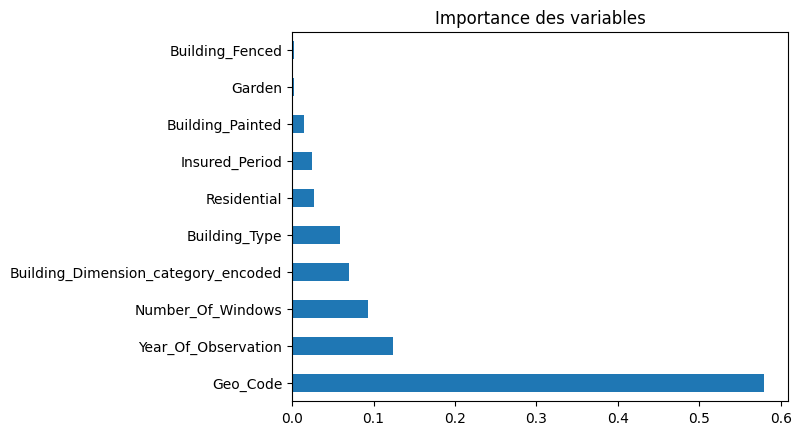

In [114]:
# Séparer les features et la target
X = data.drop(['Claim'], axis=1)
Y= data['Claim']

# Appliquer un modèle de forêt aléatoire pour obtenir l'importance des variables
model = RandomForestClassifier(random_state=42)
model.fit(X, Y)

# Importance des variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Importance des variables")
plt.show()

In [115]:
data["Claim"].value_counts()

Claim
0    3849
1    1121
Name: count, dtype: int64

In [13]:
# Séparer les classes majoritaire et minoritaire
df_majority = data[data['Claim'] == 0]
df_minority = data[data['Claim'] == 1]

# Suréchantillonner la classe minoritaire
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Échantillonnage avec remise
                                 n_samples=len(df_majority),  # Égaliser le nombre avec la classe majoritaire
                                 random_state=42)  # Pour la reproductibilité

# Combiner les échantillons
df = pd.concat([df_majority, df_minority_upsampled])

# Vérifier la distribution
print(df['Claim'].value_counts())

Claim
0    3849
1    3849
Name: count, dtype: int64


Accuracy: 0.6227272727272727
              precision    recall  f1-score   support

           0       0.61      0.72      0.66       782
           1       0.64      0.52      0.58       758

    accuracy                           0.62      1540
   macro avg       0.63      0.62      0.62      1540
weighted avg       0.63      0.62      0.62      1540



c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


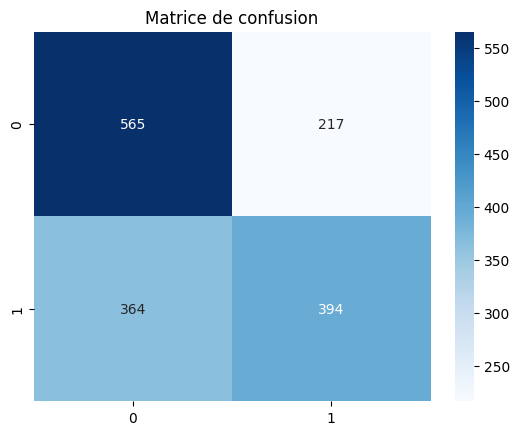

In [14]:

X = df.drop(['Claim'], axis=1)
Y= df['Claim']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
classifier = LogisticRegression(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


Accuracy: 0.8402597402597403
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       782
           1       0.79      0.93      0.85       758

    accuracy                           0.84      1540
   macro avg       0.85      0.84      0.84      1540
weighted avg       0.85      0.84      0.84      1540



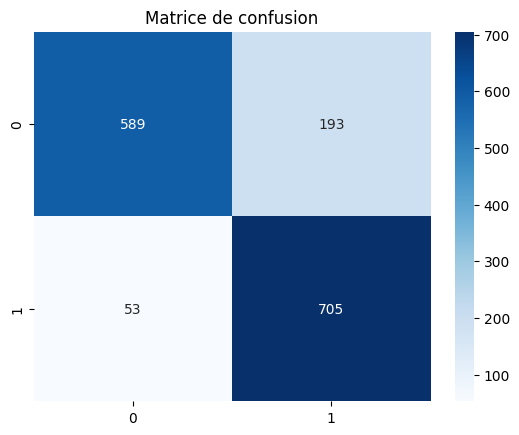

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

In [16]:
# Define the base models
base_models = [
    ('lr', LogisticRegression()),  # Logistic Regression
    ('rf', RandomForestClassifier(random_state=42)),  # Random Forest
    ('mlp', MLPClassifier(random_state=42, max_iter=300))  # Neural Network
]


In [17]:
# Définir le modèle méta
meta_model = GradientBoostingClassifier(random_state=42)

c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

Scores moyens (ROC AUC) : 0.889 ± 0.016


c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

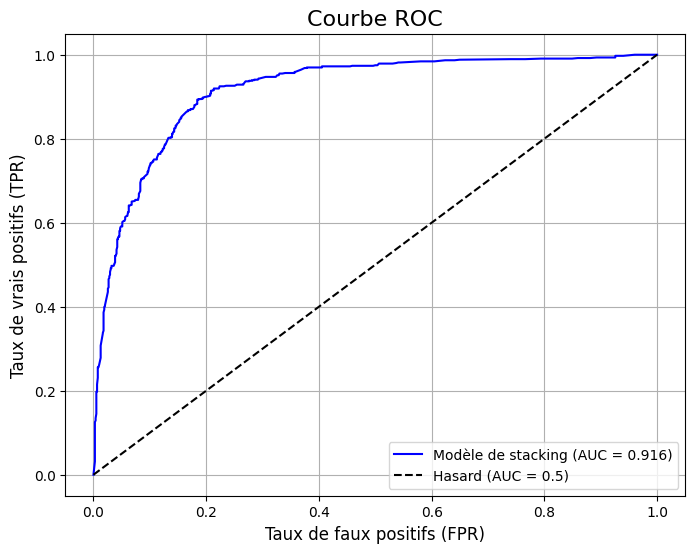

In [18]:
# Construire le modèle de stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Effectuer une validation croisée
cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='roc_auc')

# Afficher les scores moyens et leur écart-type
print(f"Scores moyens (ROC AUC) : {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

# Entraîner le modèle sur l'ensemble d'entraînement
stacking_model.fit(X_train, y_train)

# Prédire les probabilités pour l'ensemble de test
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Modèle de stacking (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Hasard (AUC = 0.5)')
plt.title("Courbe ROC", fontsize=16)
plt.xlabel("Taux de faux positifs (FPR)", fontsize=12)
plt.ylabel("Taux de vrais positifs (TPR)", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid()
plt.show()

In [19]:
# Construction du modèle de stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
# Entraîner le modèle de stacking
stacking_model.fit(X_train, y_train)

c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('mlp',
                                MLPClassifier(max_iter=300, random_state=42))],
                   final_estimator=GradientBoostingClassifier(random_state=42))

In [21]:
y_pred = stacking_model.predict(X_test)
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy du modèle de stacking : {accuracy * 100:.2f}%")
print("Rapport de classification:\n", report)

Accuracy du modèle de stacking : 84.87%
Rapport de classification:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       782
           1       0.82      0.88      0.85       758

    accuracy                           0.85      1540
   macro avg       0.85      0.85      0.85      1540
weighted avg       0.85      0.85      0.85      1540



In [22]:
cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='roc_auc')


c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

In [24]:
df["Claim"].value_counts()

Claim
0    3849
1    3849
Name: count, dtype: int64

In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier


def load_data(filepath):
    df = pd.read_csv(filepath)
    return df


def preprocess_data(df):
    # Rename columns for better readability
    df.rename(columns={
        'YearOfObservation': 'Year_Of_Observation', 
        'Building Dimension': 'Building_Dimension', 
        'NumberOfWindows': 'Number_Of_Windows'
    }, inplace=True)

    # Drop the 'Customer Id' column
    df = df.drop(columns=['Customer Id'])

    # Handle missing values
    mf_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    for col in ['Geo_Code', 'Garden']:
        df[col] = mf_imputer.fit_transform(df[[col]]).flatten()  # Flatten the result

    mf_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    df['Building_Dimension'] = mf_imputer.fit_transform(df[['Building_Dimension']]).flatten()  # Flatten the result

    # Encode categorical variables
    ord_categories = [["N", "V"], ["N", "V"], ["O", "V"], ['U', 'R'], ['Fire-resistive', 'Non-combustible', 'Ordinary', 'Wood-framed']]
    enc1 = OrdinalEncoder(categories=ord_categories)
    df[["Building_Painted", "Building_Fenced", "Garden", 'Settlement', 'Building_Type']] = enc1.fit_transform(df[["Building_Painted", "Building_Fenced", "Garden", 'Settlement', 'Building_Type']])

    # Replace categorical values in 'Number_Of_Windows' and convert to integer
    df["Number_Of_Windows"] = df["Number_Of_Windows"].replace({'without': '0', '>=10': '10'}).astype('int')

    # Encode the target variable 'Claim'
    df['Claim'] = df['Claim'].apply(lambda x: 1 if x == 'oui' else 0)

    # Label encoding for 'Geo_Code'
    le = LabelEncoder()
    df['Geo_Code'] = le.fit_transform(df['Geo_Code'])
    
    optimal_num_bins = 5  # Vous pouvez choisir en fonction de la courbe ci-dessus
    bins = np.linspace(df['Building_Dimension'].min(), df['Building_Dimension'].max(), optimal_num_bins + 1)
    df = categorize_column(df, 'Building_Dimension', bins)
    encoder = LabelEncoder()
    df['Building_Dimension_category_encoded'] = encoder.fit_transform(df['Building_Dimension_category'])

    return df
   

def handle_class_imbalance(df):
    # Upsample the minority class
    df_majority = df[df['Claim'] == 0]
    df_minority = df[df['Claim'] == 1]

    df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
    return pd.concat([df_majority, df_minority_upsampled])




In [26]:
test=pd.read_csv("test_Insurance.csv")

In [27]:
test_processed=preprocess_data(test)

In [28]:
test_processed

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim,Building_Dimension_category,Building_Dimension_category_encoded
0,2013,1.0,0,1.0,1.0,1.0,0.0,3760.0,0.0,0,229,1,Cat-1,0
1,2015,1.0,0,1.0,0.0,0.0,1.0,1452.0,0.0,5,283,0,Cat-1,0
2,2013,1.0,1,1.0,0.0,0.0,1.0,1944.0,2.0,6,647,1,Cat-1,0
3,2015,1.0,0,0.0,1.0,1.0,0.0,2270.0,1.0,0,54,1,Cat-1,0
4,2016,0.5,0,1.0,0.0,0.0,1.0,2976.0,0.0,9,260,0,Cat-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,2016,0.5,1,1.0,0.0,0.0,1.0,862.0,3.0,2,334,0,Cat-1,0
2143,2012,1.0,0,1.0,1.0,1.0,0.0,1100.0,1.0,0,322,0,Cat-1,0
2144,2014,1.0,0,1.0,0.0,0.0,1.0,730.0,1.0,3,401,0,Cat-1,0
2145,2014,1.0,1,0.0,1.0,1.0,0.0,568.0,1.0,0,405,1,Cat-1,0


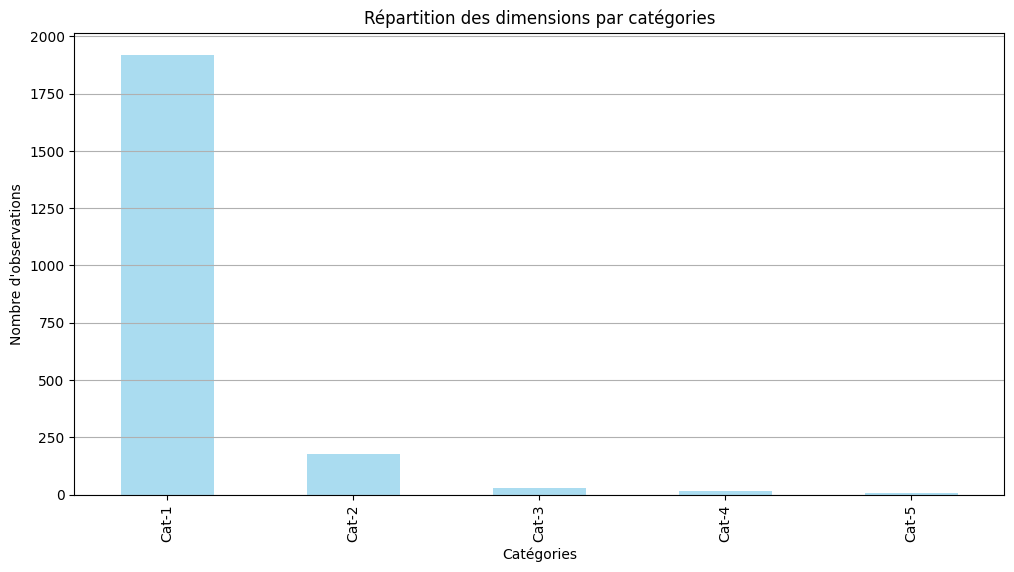

In [29]:

# Étape 6 : Visualiser la répartition des observations par catégorie
plt.figure(figsize=(12, 6))
test_processed['Building_Dimension_category'].value_counts(sort=False).plot(kind='bar', color='skyblue', alpha=0.7)
plt.title("Répartition des dimensions par catégories")
plt.xlabel("Catégories")
plt.ylabel("Nombre d'observations")
plt.grid(axis='y')
plt.show()


In [30]:

# Suppression des colonnes 'Building_Dimension', 'Building_Dimension_category', et 'Unnamed:' (si elles existent)
test_processed.drop(columns=['Building_Dimension', 'Building_Dimension_category'],axis=1, inplace=True, )

In [31]:
test_processed

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type,Number_Of_Windows,Geo_Code,Claim,Building_Dimension_category_encoded
0,2013,1.0,0,1.0,1.0,1.0,0.0,0.0,0,229,1,0
1,2015,1.0,0,1.0,0.0,0.0,1.0,0.0,5,283,0,0
2,2013,1.0,1,1.0,0.0,0.0,1.0,2.0,6,647,1,0
3,2015,1.0,0,0.0,1.0,1.0,0.0,1.0,0,54,1,0
4,2016,0.5,0,1.0,0.0,0.0,1.0,0.0,9,260,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2142,2016,0.5,1,1.0,0.0,0.0,1.0,3.0,2,334,0,0
2143,2012,1.0,0,1.0,1.0,1.0,0.0,1.0,0,322,0,0
2144,2014,1.0,0,1.0,0.0,0.0,1.0,1.0,3,401,0,0
2145,2014,1.0,1,0.0,1.0,1.0,0.0,1.0,0,405,1,0


In [32]:

X2 = test_processed.drop(['Claim'], axis=1)
Y2= test_processed['Claim']

In [33]:
y_pred2 = stacking_model.predict(X2)


In [35]:
# Évaluer le modèle
accuracy = accuracy_score(Y2, y_pred2)
report = classification_report(Y2, y_pred2)
print(f"Accuracy du modèle de stacking : {accuracy * 100:.2f}%")
print("Rapport de classification:\n", report)

Accuracy du modèle de stacking : 70.70%
Rapport de classification:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81      1639
           1       0.35      0.28      0.31       508

    accuracy                           0.71      2147
   macro avg       0.57      0.56      0.56      2147
weighted avg       0.69      0.71      0.69      2147



In [45]:
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [46]:
dt_prediction=dt_model.predict(X2)

In [47]:
# Évaluer le modèle
accuracy = accuracy_score(Y2,dt_prediction)
report = classification_report(Y2, dt_prediction)
print(f"Accuracy du modèle de stacking : {accuracy * 100:.2f}%")
print("Rapport de classification:\n", report)

Accuracy du modèle de stacking : 68.70%
Rapport de classification:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      1639
           1       0.37      0.46      0.41       508

    accuracy                           0.69      2147
   macro avg       0.59      0.61      0.60      2147
weighted avg       0.71      0.69      0.70      2147

